In [2]:
import numpy as np

from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import uniform

import random

import matplotlib.pyplot as plt

from scipy.special import digamma
from scipy.special import gamma

In [3]:
b = beta(1,2)
b.rvs()

0.6292577435258727

In [5]:
# Alpha is the discount term (set to 0 to recover the standard stick breaking process)
# Theta is the standard strenght parameter

def sampling_PY_stick_breaking(H, alpha, theta, sample_size = 1000):
    weights = list()
    parameters = list()
    total = 1
    for i in range(sample_size):
        
        # Initialize the beta distribution
        b = beta(1-alpha, theta + (i+1)*alpha)
        
        # Draw the parameter
        param = H.rvs()
        
        # Compute the weight
        y = b.rvs()
        pi = y*total
        
        # Update the total sum (what is left of the stick)
        total *= (1-y)
        
        # Add to the previous parameters
        weights.append(pi)
        parameters.append(param)
    
    return np.array(weights), np.array(parameters)
    

# Dirichlet process 

In [28]:
alpha = 0
theta = 1.0
weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = 10)

In [29]:
np.cumsum(weights)

array([0.68065039, 0.98116308, 0.99425418, 0.99806497, 0.99830367,
       0.99916374, 0.99999663, 0.99999788, 0.99999871, 0.99999984])

In [73]:
print("The total mass is ", np.sum(weights))

The total mass is  0.9999995085646032


In [74]:
n_iter = 100
sample_size = 10
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

In [75]:
print("The average total mass with {} samples is {}".format(sample_size, average_mass))

The average total mass with 10 samples is 0.9995258120028528


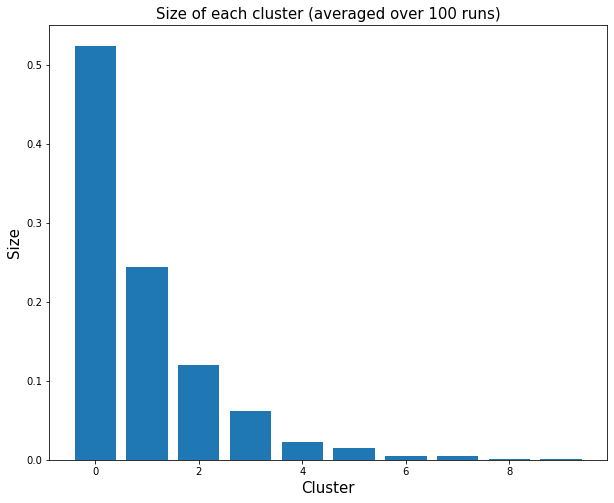

In [76]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)
plt.bar(np.arange(average_weights.shape[0]), average_weights)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
plt.show()

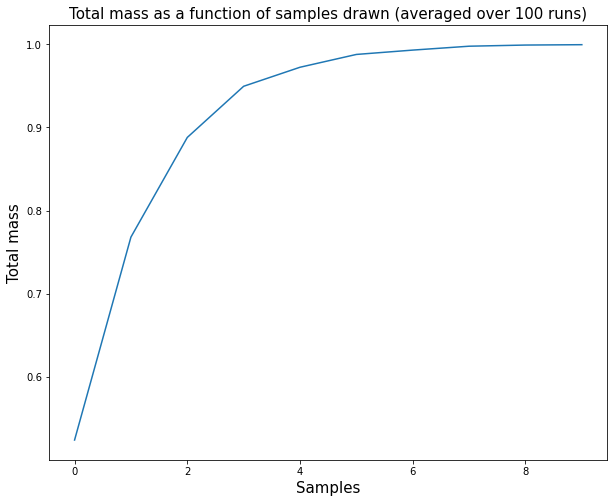

In [77]:
plt.figure(figsize = (10,8))
plt.title("Total mass as a function of samples drawn (averaged over 100 runs)", size = 15)
plt.plot(np.arange(cum_mass.shape[0]), cum_mass)
plt.ylabel("Total mass", size = 15)
plt.xlabel("Samples", size = 15)
plt.show()

# Pitman-Yor

## alpha = 0.5

In [78]:
alpha = 0.5
theta = 1.0
weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = 1000)

In [79]:
print("The total mass is ", np.sum(weights))

The total mass is  0.9951597476414784


In [80]:
n_iter = 100
sample_size = 300
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

In [81]:
print("The average total mass with {} samples is {}".format(sample_size, average_mass))

The average total mass with 300 samples is 0.9900589841431582


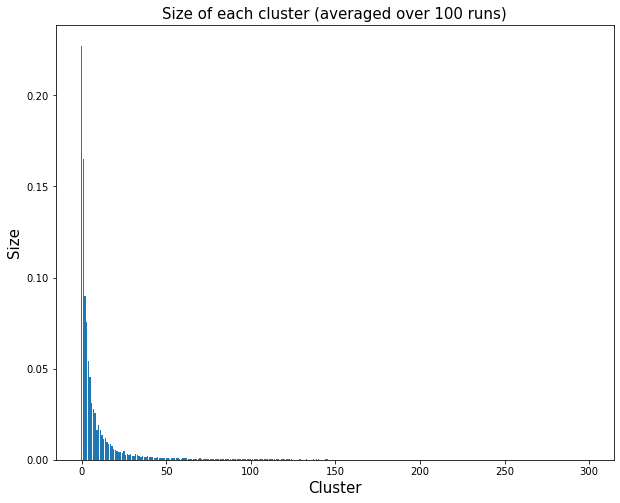

In [82]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)
plt.bar(np.arange(average_weights.shape[0]), average_weights)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
plt.show()

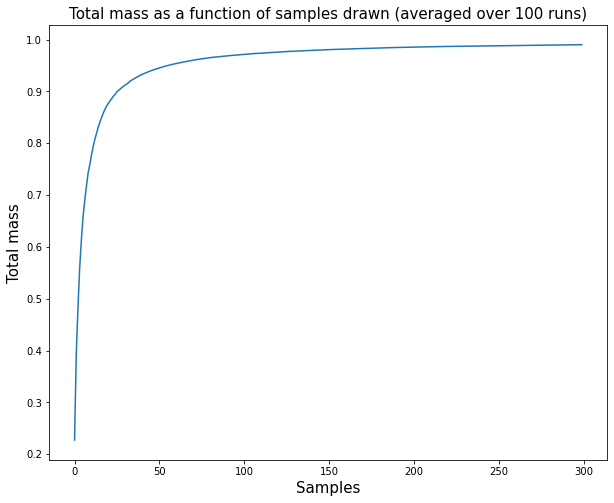

In [83]:
plt.figure(figsize = (10,8))
plt.title("Total mass as a function of samples drawn (averaged over 100 runs)", size = 15)
plt.plot(np.arange(cum_mass.shape[0]), cum_mass)
plt.ylabel("Total mass", size = 15)
plt.xlabel("Samples", size = 15)
plt.show()

## alpha = 0.9

In [62]:
alpha = 0.9
theta = 1.0
weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = 10000)

In [63]:
print("The total mass is ", np.sum(weights))

The total mass is  0.641388460656452


In [65]:
n_iter = 100
sample_size = 1000
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

In [66]:
print("The average total mass with {} samples is {}".format(sample_size, average_mass))

The average total mass with 1000 samples is 0.5056315039246303


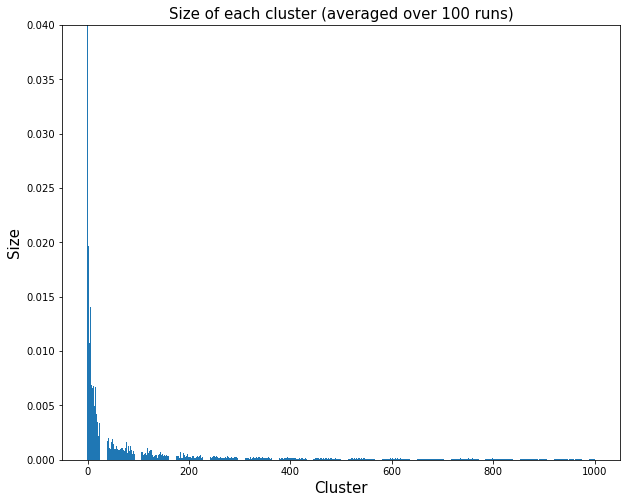

In [69]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)
plt.bar(np.arange(average_weights.shape[0]), average_weights)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
plt.ylim(top = 0.04)
plt.show()

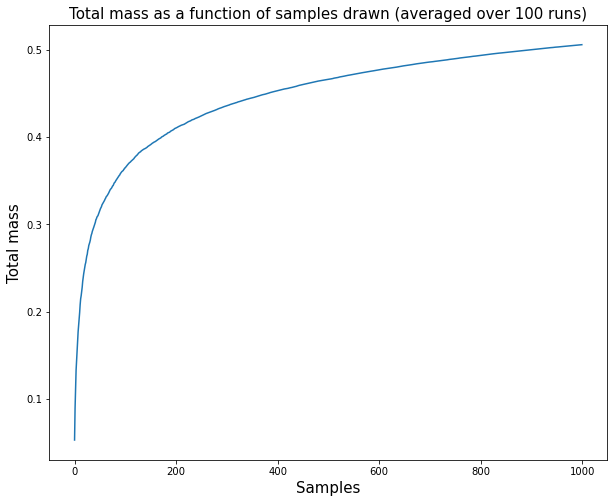

In [70]:
plt.figure(figsize = (10,8))
plt.title("Total mass as a function of samples drawn (averaged over 100 runs)", size = 15)
plt.plot(np.arange(cum_mass.shape[0]), cum_mass)
plt.ylabel("Total mass", size = 15)
plt.xlabel("Samples", size = 15)
plt.show()

# Special case: theta = 0

## alpha = 0.1

In [96]:
alpha = 0.1
theta = 0
weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = 10)

In [97]:
print("The total mass is ", np.sum(weights))

The total mass is  1.0


In [99]:
n_iter = 100
sample_size = 10
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

In [100]:
print("The average total mass with {} samples is {}".format(sample_size, average_mass))

The average total mass with 10 samples is 0.9999992830334186


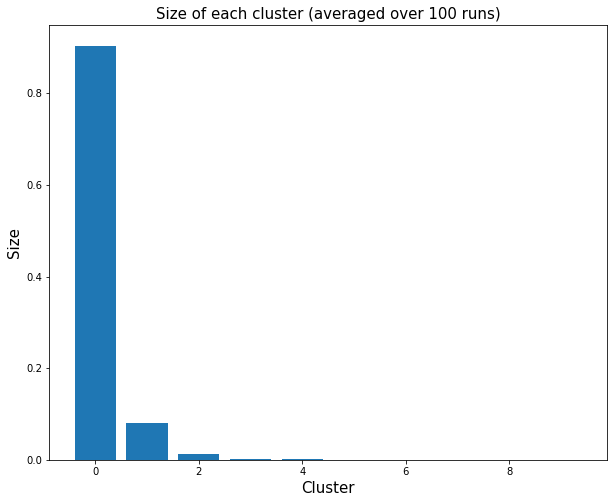

In [101]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)
plt.bar(np.arange(average_weights.shape[0]), average_weights)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
#plt.ylim(top = 0.04)
plt.show()

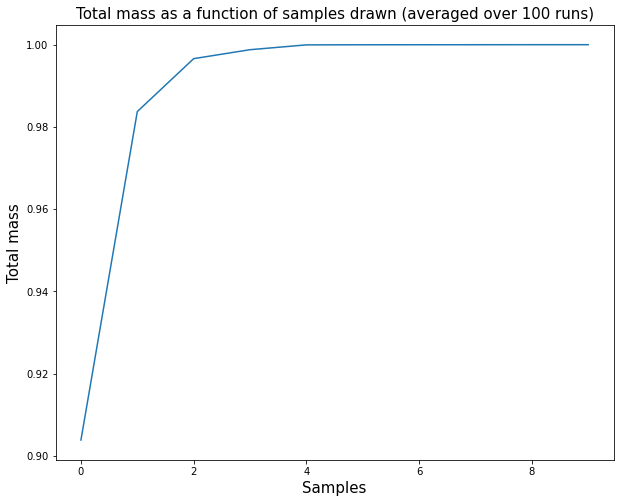

In [102]:
plt.figure(figsize = (10,8))
plt.title("Total mass as a function of samples drawn (averaged over 100 runs)", size = 15)
plt.plot(np.arange(cum_mass.shape[0]), cum_mass)
plt.ylabel("Total mass", size = 15)
plt.xlabel("Samples", size = 15)
plt.show()

## alpha = 0.5

In [90]:
alpha = 0.5
theta = 0
weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = 100)

In [89]:
print("The total mass is ", np.sum(weights))

The total mass is  0.9748074310066199


In [91]:
n_iter = 100
sample_size = 100
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

In [92]:
print("The average total mass with {} samples is {}".format(sample_size, average_mass))

The average total mass with 100 samples is 0.9902450836600712


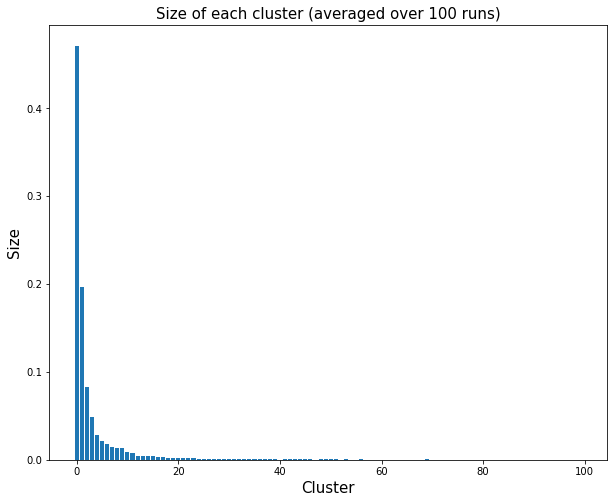

In [95]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)
plt.bar(np.arange(average_weights.shape[0]), average_weights)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
#plt.ylim(top = 0.04)
plt.show()

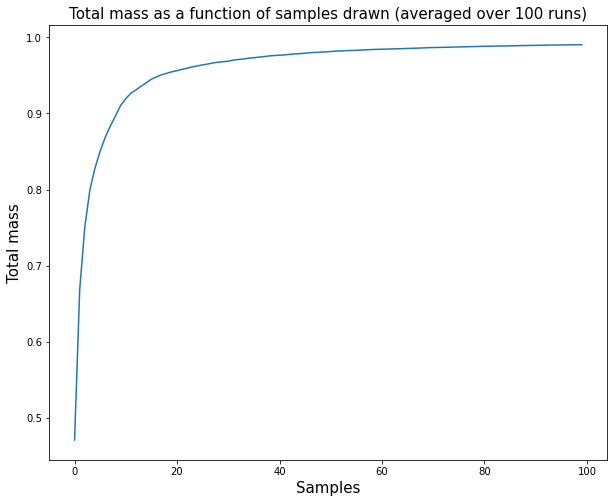

In [94]:
plt.figure(figsize = (10,8))
plt.title("Total mass as a function of samples drawn (averaged over 100 runs)", size = 15)
plt.plot(np.arange(cum_mass.shape[0]), cum_mass)
plt.ylabel("Total mass", size = 15)
plt.xlabel("Samples", size = 15)
plt.show()

## alpha = 0.9

In [105]:
alpha = 0.9
theta = 0
weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = 100)

In [106]:
print("The total mass is ", np.sum(weights))

The total mass is  0.6572509770140726


In [107]:
n_iter = 100
sample_size = 500
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

In [108]:
print("The average total mass with {} samples is {}".format(sample_size, average_mass))

The average total mass with 500 samples is 0.5355565161514197


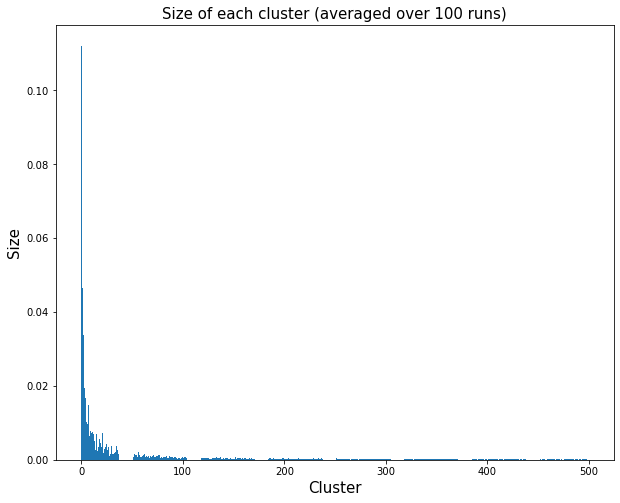

In [109]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)
plt.bar(np.arange(average_weights.shape[0]), average_weights)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
#plt.ylim(top = 0.04)
plt.show()

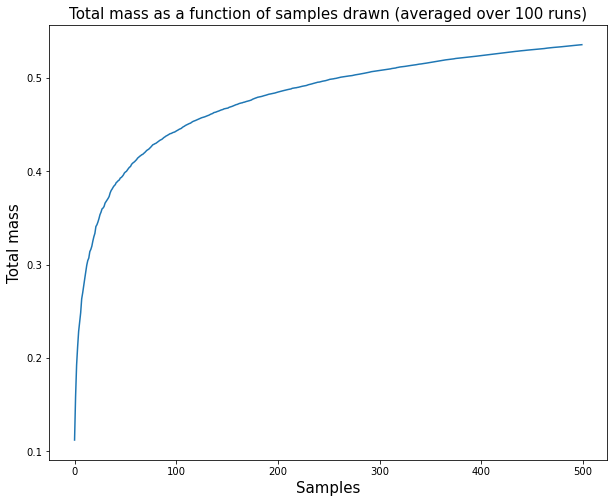

In [110]:
plt.figure(figsize = (10,8))
plt.title("Total mass as a function of samples drawn (averaged over 100 runs)", size = 15)
plt.plot(np.arange(cum_mass.shape[0]), cum_mass)
plt.ylabel("Total mass", size = 15)
plt.xlabel("Samples", size = 15)
plt.show()

# Direct comparison

The average total mass with alpha = 0 is 0.999999570659255
The average total mass with alpha = 0.5 is 0.878359724586838
The average total mass with alpha = 0.9 is 0.24705935023223813


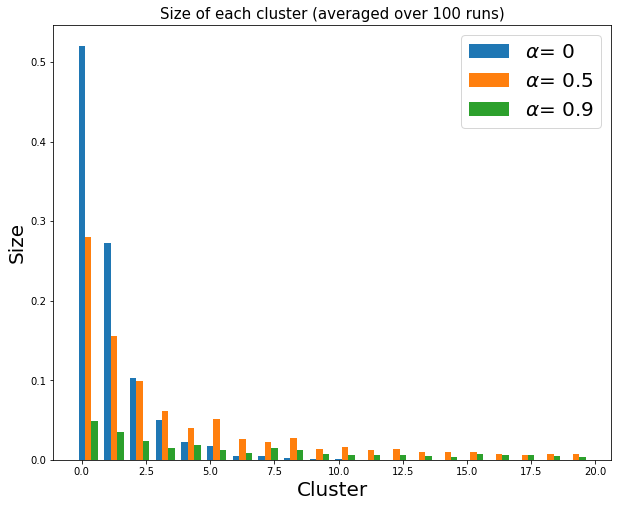

In [24]:


n_iter = 100
sample_size = 20

plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)


alpha = 0
theta = 1.0
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter
    
print("The average total mass with alpha = {} is {}".format(alpha, average_mass))
plt.bar(np.arange(average_weights.shape[0]), average_weights, label = r"$\alpha$= {}".format(alpha), width = 0.25)

alpha = 0.5
theta = 1.0
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter
    
print("The average total mass with alpha = {} is {}".format(alpha, average_mass))
plt.bar(np.arange(average_weights.shape[0])+ 0.25, average_weights, label = r"$\alpha$= {}".format(alpha), width = 0.25)

alpha = 0.9
theta = 1.0
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter
    
print("The average total mass with alpha = {} is {}".format(alpha, average_mass))
plt.bar(np.arange(average_weights.shape[0]) + 0.5, average_weights, label = r"$\alpha$= {}".format(alpha), width = 0.25)




plt.xlabel("Cluster", size = 20)
plt.ylabel("Size", size = 20)
plt.legend(prop={'size': 20})
#plt.ylim(top = 0.04)
plt.show()

The average total mass with alpha = 0 is 0.9999994445545204
The average total mass with alpha = 0.5 is 0.864896672112198
The average total mass with alpha = 0.9 is 0.24003422884287223


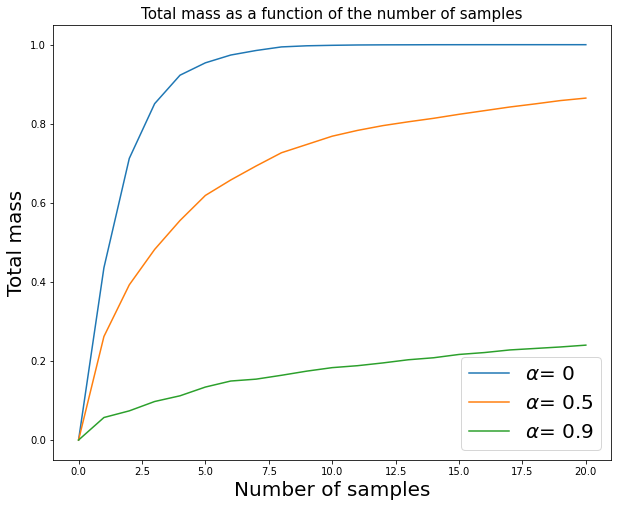

In [39]:


n_iter = 100
sample_size = 20

plt.figure(figsize = (10,8))
plt.title("Total mass as a function of the number of samples", size = 15)


alpha = 0
theta = 1.0
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

cum_mass = np.hstack((np.zeros(1), cum_mass))
print("The average total mass with alpha = {} is {}".format(alpha, average_mass))
plt.plot(np.arange(cum_mass.shape[0]), cum_mass, label = r"$\alpha$= {}".format(alpha))

alpha = 0.5
theta = 1.0
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter
    
print("The average total mass with alpha = {} is {}".format(alpha, average_mass))
cum_mass = np.hstack((np.zeros(1), cum_mass))
plt.plot(np.arange(cum_mass.shape[0]), cum_mass, label = r"$\alpha$= {}".format(alpha))

alpha = 0.9
theta = 1.0
average_weights = np.zeros(sample_size)
average_mass = 0
cum_mass = np.zeros(sample_size)
for i in range(n_iter):
    weights, parameters = sampling_PY_stick_breaking(norm, alpha, theta, sample_size = sample_size)
    average_weights += weights/n_iter
    average_mass += np.sum(weights)/n_iter
    cum_mass += np.cumsum(weights)/n_iter

cum_mass = np.hstack((np.zeros(1), cum_mass))
print("The average total mass with alpha = {} is {}".format(alpha, average_mass))
plt.plot(np.arange(cum_mass.shape[0]), cum_mass, label = r"$\alpha$= {}".format(alpha))



plt.xlabel("Number of samples", size = 20)
plt.ylabel("Total mass", size = 20)
plt.legend(prop={'size': 20})
#plt.ylim(top = 0.04)
plt.show()

In [34]:
np.hstack((np.zeros(1), cum_mass)).shape

(21,)

In [27]:
cum_mass

array([0.05564004, 0.10573108, 0.11297888, 0.12572566, 0.1284679 ,
       0.14385687, 0.14578652, 0.1624192 , 0.16312404, 0.16480403,
       0.17868645, 0.17981578, 0.18905489, 0.19003519, 0.19630696,
       0.19837902, 0.20058705, 0.20337819, 0.20558232, 0.21147653])